# Installing the PyCaret library 
# This libraray facilitates the streamlined implementation of machine learning tasks, offering a concise and simplified coding approach for various operations, including data preprocessing, model training, and evaluation. 


In [1]:
!pip install pycaret

# Importing the essential libraries for better understanding of data 

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
from pycaret.classification import * 
warnings.filterwarnings ('ignore')

# Loading the file 

In [3]:
df = pd.read_csv(r"C:\Users\pc\Desktop\Data Analysis Projects\Iris.csv", index_col = 0) # this index function removes the serial numbers 
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


# checking if there are any null values 

In [4]:
df.isnull().sum() # there are no null values in this data set 

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# This function is used to know how many species of plants are there in the data set 

In [5]:
df['Species'].value_counts()
#there are total 3 plant species in the data set 

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

 # The info function is used to get a overview of our data frame it shows the  following information
# The total number of entries (rows).
# The total number of columns.
# The data type of each column.
# The number of non-null values in each column.
# The amount of memory used by the DataFrame. 

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int32  
 5   flower         150 non-null    int64  
dtypes: float64(4), int32(1), int64(1)
memory usage: 7.6 KB


# The df.describe() method in pandas is used to generate descriptive statistics of a DataFrame or Series.
# it shows the following 

In [9]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
#Here's what each part does:

#per25: Calculates the 25th percentile (first quartile) of the column.
#per75: Calculates the 75th percentile (third quartile) of the column.
#IQR: Calculates the Interquartile Range, which is the difference between the 75th and 25th 
#UL: Calculates the Upper Limit for potential outliers. It is defined as per75 + 1.5 * IQR.
#LL: Calculates the Lower Limit for potential outliers. It is defined as per25 - 1.5 * IQR.
#print("IQR - ", IQR): Displays the calculated Interquartile Range.
#print("Upper Limit & Lower Limit - ", UL, LL): Displays the calculated Upper and Lower Limits.
#print(df[df[col] > UL], '\n', df[df[col] < LL]): Prints rows where the values in the specified column (col) 
#are greater than the Upper Limit (UL) or less than the Lower Limit (LL). These rows are considered potential outliers.

In [11]:
def outliers(col):
    per25 = df[col].quantile(0.25)
    per75 = df[col].quantile(0.75)
    IQR = per75 - per25               # Interquartile Range (IQR)
    UL = per75 + 1.5 * IQR            # Upper Limit
    LL = per25 - 1.5 * IQR            # Lower Limit
    print("IQR - ", IQR)
    print("Upper Limit & Lower Limit - ", UL, LL)
    print(df[df[col] > UL], '\n', df[df[col] < LL])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


# A new column named 'flower' is created in the DataFrame, providing numeric labels (1, 2, 3) for each of the three distinct 
# species ('Iris-setosa,' 'Iris-versicolor,' 'Iris-virginica'). This numeric encoding facilitates computational tasks, particularly in machine learning, by representing categorical species information in a standardized numerical format.
# particularly in machine learning, by representing categorical species information in a standardized numerical format.

In [12]:
df['flower'] = df['Species'].map({'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3})
df


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,flower
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,3
147,6.3,2.5,5.0,1.9,Iris-virginica,3
148,6.5,3.0,5.2,2.0,Iris-virginica,3


# in this graphical representaion we are showing the flowers cm width & height as a 
# as a box plot representation 

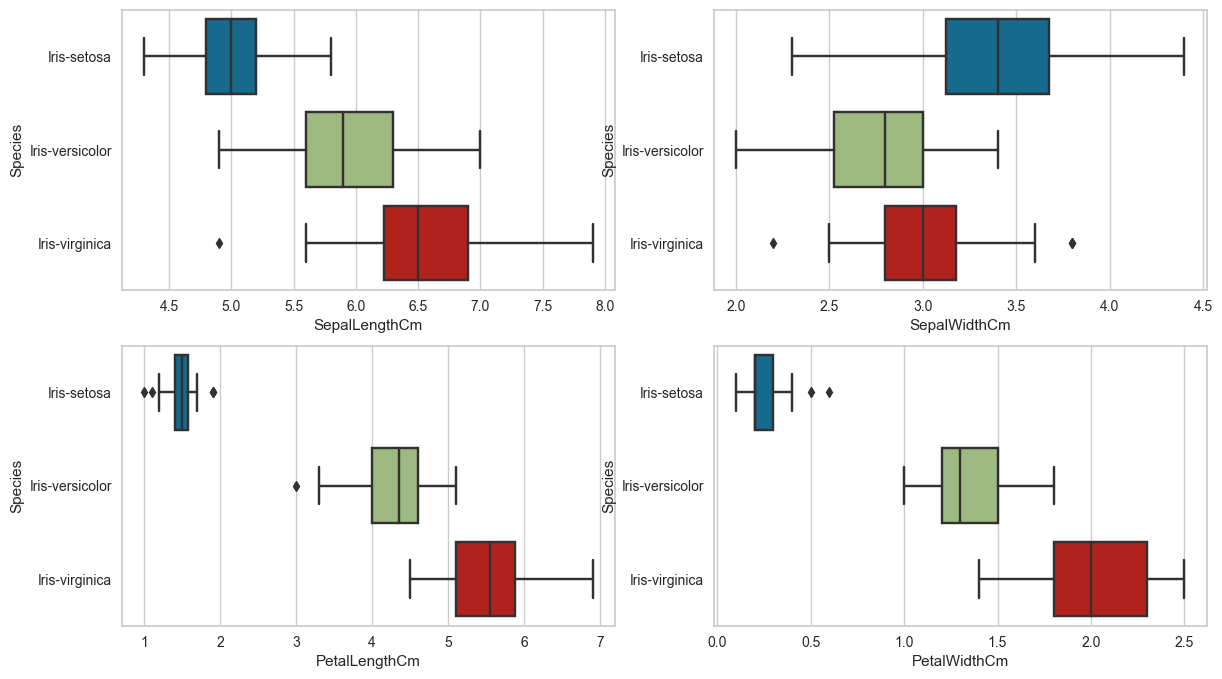

In [13]:
plt.figure(figsize = (14,8))

for i,z in enumerate(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']):#The enumerate function is used to get both the index i and the feature z.
    plt.subplot(2,2,i+1) #Creates a subplot in a 2x2 grid. The i + 1 is used to set the position of the current subplot in the grid.
    sns.boxplot(data = df, y = 'Species', x = z,orient = 'h')#
plt.show()

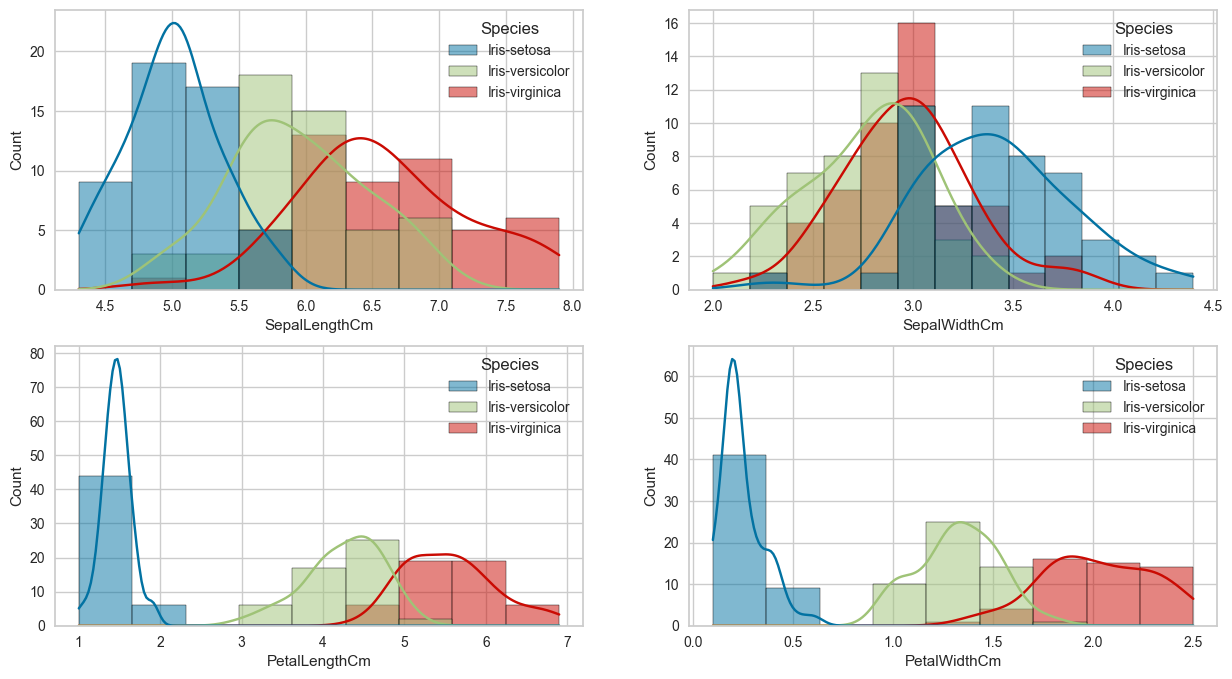

In [14]:
# this is a histogram representaion 
# 2x2 grid of histograms
plt.figure(figsize = (15,8))

for i,z in enumerate(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']):
    plt.subplot(2,2,i+1)
    sns.histplot(data = df, x = z,kde = True,hue = 'Species')
plt.show()

In [15]:
# seaborn library is used to create a grid of scatterplots and histograms, 
# showing the relationships between pairs of numerical features in the DataFrame.


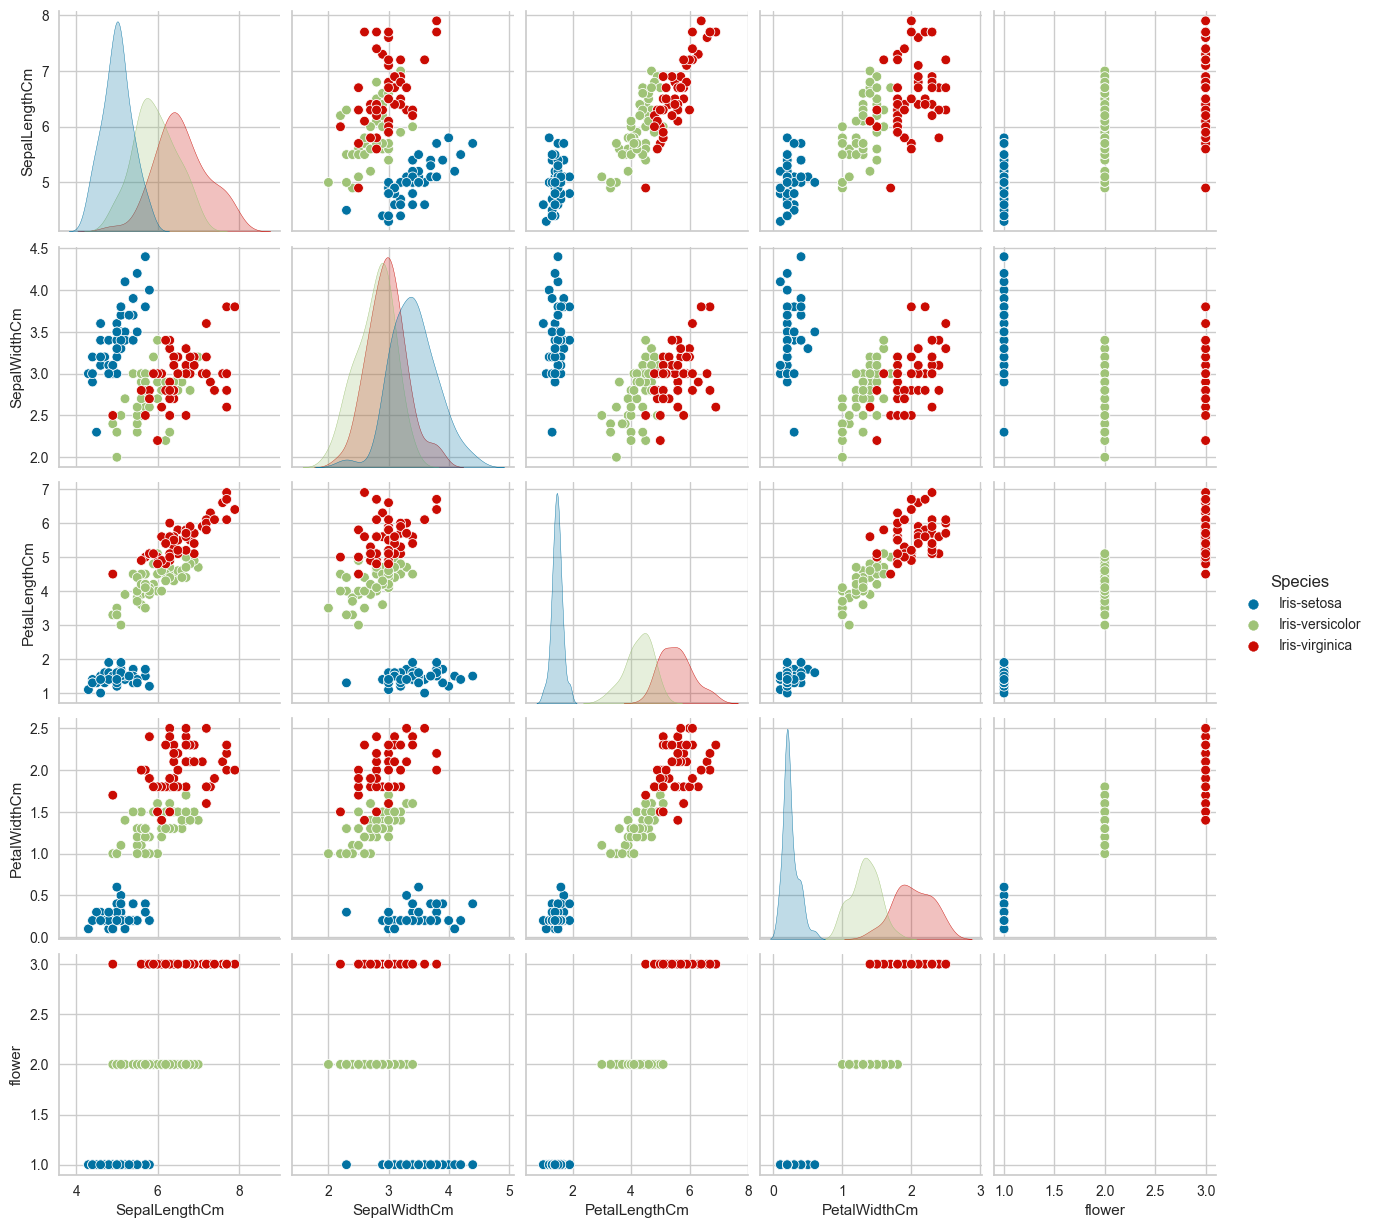

In [16]:
sns.pairplot(data = df , hue = 'Species')

# this generates a heatmap of the correlation matrix for the numerical features 
# in the DataFrame (df). This heatmap is a visual representation of the pairwise
# correlation coefficients between different numerical variables. Let's break 
# down the code:

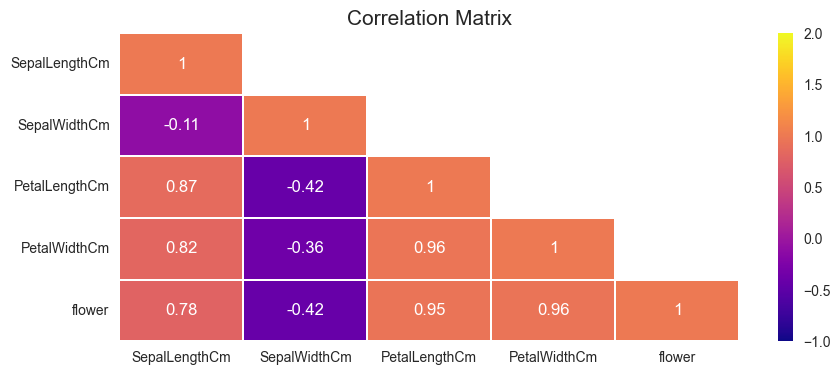

In [17]:
cor =df.corr()
plt.figure(figsize=(10,4))
mask = np.triu(np.ones_like(cor, dtype=bool))
np.fill_diagonal(mask, False)
sns.heatmap(cor, annot=True, mask=mask, vmin=-1, vmax=2,linewidths=0.2, cmap='plasma')
plt.title("Correlation Matrix", fontsize=15)
plt.show()

<AxesSubplot: >

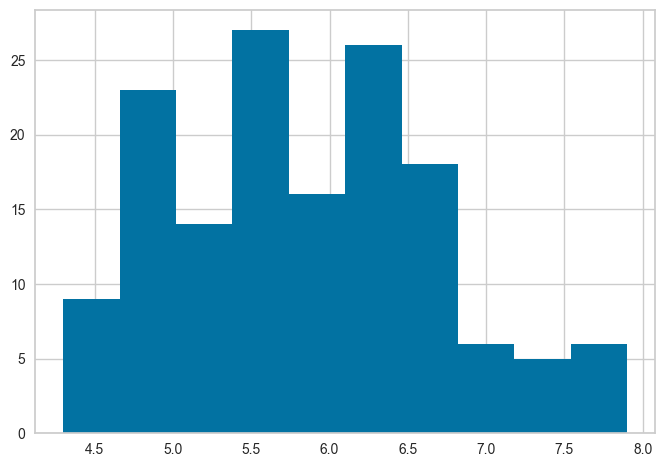

In [18]:
# plotting histogram for each feature 
df['SepalLengthCm'].hist()

<AxesSubplot: >

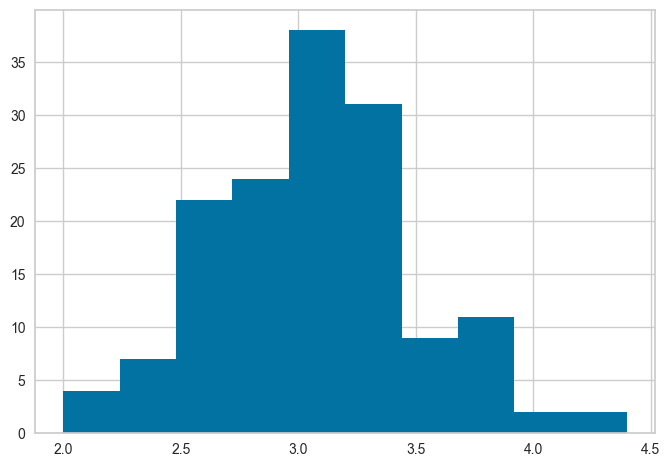

In [19]:
df['SepalWidthCm'].hist()

<AxesSubplot: >

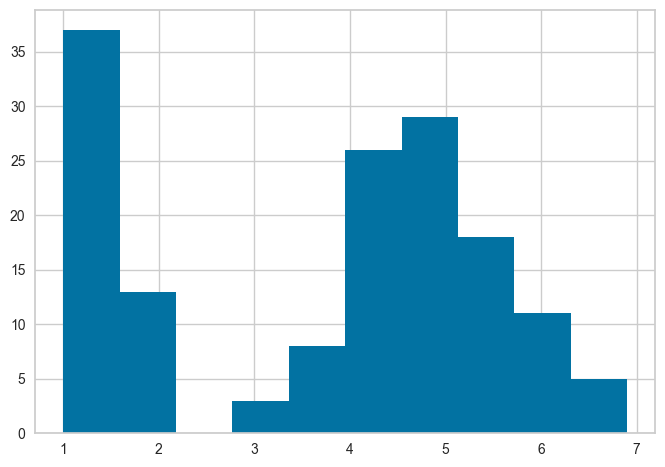

In [20]:

df['PetalLengthCm'].hist()

<AxesSubplot: >

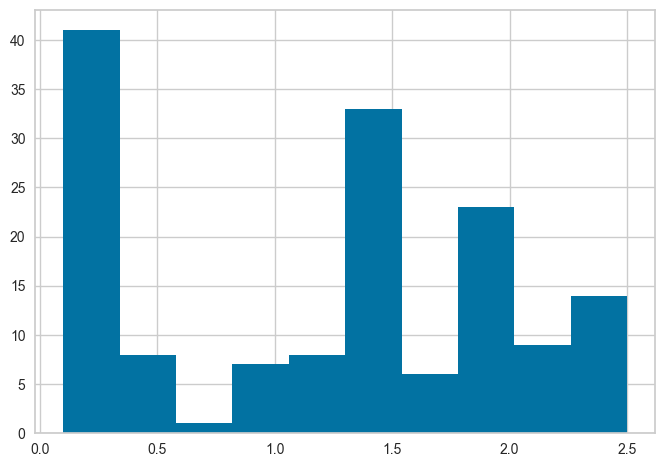

In [21]:
df['PetalWidthCm'].hist()

<AxesSubplot: >

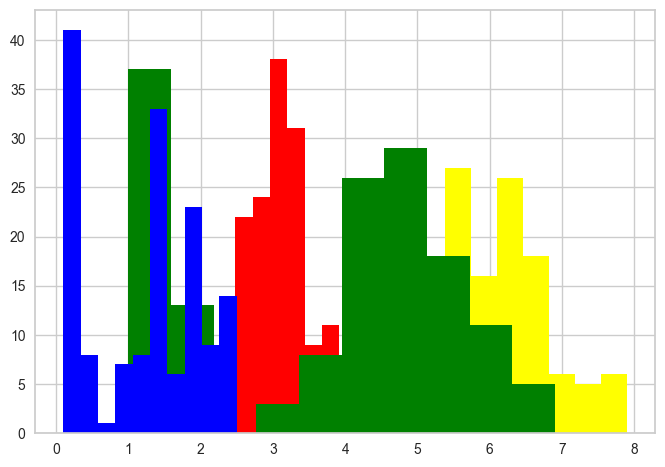

In [22]:
#Plotting histogram for all the features together
df['SepalLengthCm'].hist(color='yellow')
df['SepalWidthCm'].hist(color='red')
df['PetalLengthCm'].hist(color='green')
df['PetalWidthCm'].hist(color='blue')

In [23]:
#To convert the "Species" column to numeric and then perform the correlation, we use the 'LabelEncoder'
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder
le = LabelEncoder()

# Fit and transform the "Species" column to convert species names to integers
df['Species'] = le.fit_transform(df['Species'])

# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954   
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544   
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757   
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000   
Species             0.782561     -0.419446       0.949043      0.956464   
flower              0.782561     -0.419446       0.949043      0.956464   

                Species    flower  
SepalLengthCm  0.782561  0.782561  
SepalWidthCm  -0.419446 -0.419446  
PetalLengthCm  0.949043  0.949043  
PetalWidthCm   0.956464  0.956464  
Species        1.000000  1.000000  
flower         1.000000  1.000000  


<AxesSubplot: >

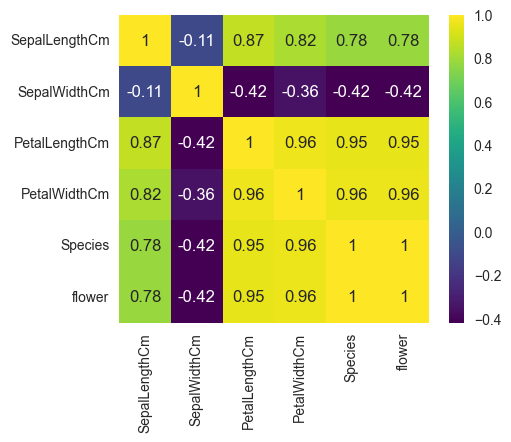

In [24]:
# display the correlation matrix using a heatmap
corr = correlation_matrix
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, annot=True, ax=ax, cmap='viridis')


# Model Training

In [26]:
# Split the dataset into training and testing sets using sklearn library

from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.40)

In [28]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

# model fitting
model.fit(x_train,y_train)

# model accuracy
print("Accuracy(Logistic Regression): ",model.score(x_test,y_test)*100)

Accuracy(Logistic Regression):  100.0
